# 深度学习作业2：线性模型

## 题目描述：

某公司希望评估其员工的工作满意度，这对于改善员工福利政策和提高工作效率至关重要。公司收集了以下数据：

- 每日工作小时数
- 每周完成的项目数量
- 每月加班小时数
- 岗位级别（例如：1-初级，2-中级，3-高级）

公司希望你使用这些数据来预测员工的工作满意度。工作满意度被量化为从1到10的整数评分。

## 数据分析

/content/drive/MyDrive/Dataset/DL_HW2

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# 数据路径
data_path = '/content/drive/MyDrive/Dataset/DL_HW2/'

# 特征数据
X_train = pd.read_csv(f'{data_path}X_train.csv')
X_test = pd.read_csv(f'{data_path}X_test.csv')

# 标签数据
y_train = pd.read_csv(f'{data_path}y_train.csv')
y_test = pd.read_csv(f'{data_path}y_test.csv')


In [36]:
print("=== X_train ===")
display(X_train.head())

print("=== y_train ===")
display(y_train.head())

print("=== X_test ===")
display(X_test.head())

print("=== y_test ===")
display(y_test.head())


=== X_train ===


,Daily Work Hours,Weekly Projects,Monthly Overtime Hours,Job Level
0,1.534513,-0.543063,0.451638,-0.893009
1,-0.547271,1.247256,1.883234,0.388209
2,1.150930,-0.543063,0.274279,-0.893009
3,0.066453,0.650483,0.543618,-0.893009
4,-0.813614,0.053710,0.272723,-0.893009


=== y_train ===


,Satisfaction Score
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0


=== X_test ===


,Daily Work Hours,Weekly Projects,Monthly Overtime Hours,Job Level
0,-0.879223,0.053710,0.071544,-0.893009
1,-1.255576,1.247256,-1.011475,1.669428
2,-1.147248,-0.543063,0.302739,-0.893009
3,-0.899143,1.247256,1.114186,1.669428
4,0.856663,0.053710,-0.973141,0.388209


=== y_test ===


,Satisfaction Score
0,5.0
1,6.0
2,4.0
3,6.0
4,6.0




---



## 线性回归模型

In [37]:
# 转换为NumPy数组
X_train_np = X_train.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32).reshape(-1, 1)
X_test_np = X_test.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32).reshape(-1, 1)

# 转换为PyTorch张量
X_train_tensor = torch.from_numpy(X_train_np)
y_train_tensor = torch.from_numpy(y_train_np)
X_test_tensor = torch.from_numpy(X_test_np)
y_test_tensor = torch.from_numpy(y_test_np)

# 创建TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# 定义DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [38]:
# 定义模型
class LinearNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearNetwork, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

input_dim = X_train.shape[1]
output_dim = 1
model = LinearNetwork(input_dim, output_dim)

# 定义损失函数和优化器
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 100

for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        loss = loss_func(model(batch_X), batch_y)
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        loss_value = loss_func(model(X_train_tensor), y_train_tensor)
        print(loss_value.item())


29.1282958984375
26.345670700073242
23.831144332885742
21.558713912963867
19.50453758239746
17.648212432861328
15.970320701599121
14.45382308959961
13.083293914794922
11.844464302062988
10.724742889404297
9.712719917297363
8.797823905944824
7.9710798263549805
7.223671913146973
6.547935962677002
5.937240123748779
5.385161876678467
4.886048316955566
4.434864044189453
4.027046203613281
3.6583287715911865
3.3250343799591064
3.0236711502075195
2.751271963119507
2.5049796104431152
2.2823195457458496
2.080995559692383
1.8990349769592285
1.7344343662261963
1.5857229232788086
1.4512535333633423
1.3296345472335815
1.219716191291809
1.1203019618988037
1.0303940773010254
0.9491214156150818
0.8755829334259033
0.8091222643852234
0.7490515112876892
0.6947424411773682
0.6456301808357239
0.6012188792228699
0.5610582828521729
0.5247315764427185
0.49187007546424866
0.4621666371822357
0.4352751076221466
0.4110111594200134
0.3890397548675537
0.3691636621952057
0.35118672251701355
0.3349217176437378
0.32023

*注：这里迭代轮次设置为100，从输出结果可见，设置为10时明显是欠拟合的，在调整到100后，效果明显更好*

测试集预测准确率: 76.50%
测试集均方误差: 0.1532


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


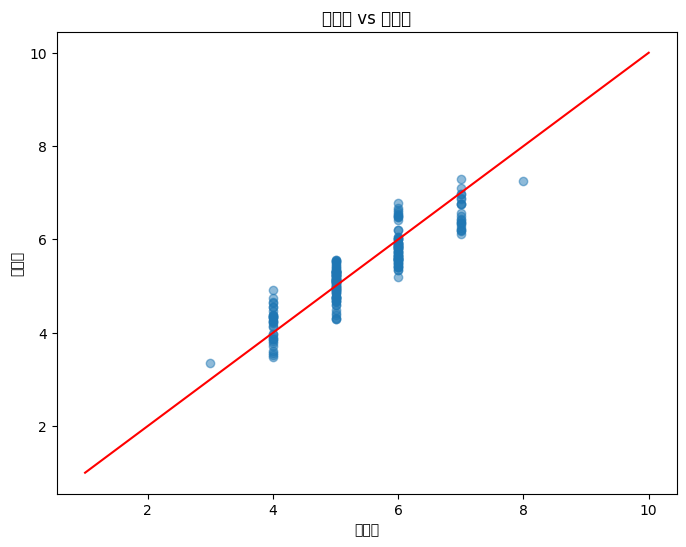

In [39]:
# 评估模型
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_rounded = torch.round(y_pred)

    correct = (y_pred_rounded == y_test_tensor).sum().item()
    total = y_test_tensor.size(0) * y_test_tensor.size(1)
    accuracy = correct / total * 100
    print(f'测试集预测准确率: {accuracy:.2f}%')

    mse = loss_func(y_pred, y_test_tensor).item()
    print(f'测试集均方误差: {mse:.4f}')

    # 可视化真实值与预测值的对比
    plt.figure(figsize=(8,6))
    plt.scatter(y_test_tensor.numpy(), y_pred.numpy(), alpha=0.5)
    plt.plot([1,10], [1,10], 'r')  # 具体看与对角线上点的差距
    plt.xlabel('真实值')
    plt.ylabel('预测值')
    plt.title('真实值 vs 预测值')
    plt.show()



---



## 线性分类模型

In [40]:
# 重新定义分类模型专用的变量与回归模型作区分
# 转换标签为整数类型，并调整范围为0-9
y_train_class = (y_train_tensor.long() - 1).squeeze()  # 去除多余的维度
y_test_class = (y_test_tensor.long() - 1).squeeze()

# 创建TensorDataset用于分类
train_dataset_class = TensorDataset(X_train_tensor, y_train_class)
test_dataset_class = TensorDataset(X_test_tensor, y_test_class)

# 定义DataLoader用于分类
train_loader_class = DataLoader(train_dataset_class, batch_size=batch_size, shuffle=True)
test_loader_class = DataLoader(test_dataset_class, batch_size=batch_size, shuffle=False)


In [41]:
# 定义Softmax回归模型
class SoftmaxRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

input_size = X_train.shape[1]
num_classes = 10 # 0-9共十类
model_class = SoftmaxRegression(input_size, num_classes)

# 定义损失函数和优化器
criterion_class = nn.CrossEntropyLoss()
learning_rate = 0.05
optimizer_class = torch.optim.SGD(model_class.parameters(), lr=learning_rate)

# 训练模型
num_epochs = 200

for epoch in range(num_epochs):
    for features, labels in train_loader_class:
        optimizer_class.zero_grad() # 清零梯度
        outputs = model_class(features) # 前向传播
        loss = criterion_class(outputs, labels) # 计算损失
        loss.backward() # 反向传播
        optimizer_class.step() # 更新参数
    with torch.no_grad():
        loss_value = criterion_class(model_class(X_train_tensor), y_train_class)
        print(loss_value.item())


2.0241525173187256
1.729103446006775
1.5240309238433838
1.3835382461547852
1.2849541902542114
1.2115997076034546
1.1550849676132202
1.1099809408187866
1.0729550123214722
1.0420761108398438
1.015917420387268
0.9934701323509216
0.973972499370575
0.9569379687309265
0.9418888688087463
0.9284700751304626
0.9164485931396484
0.9055947661399841
0.8957132697105408
0.8866958022117615
0.8784013986587524
0.8707539439201355
0.8636427521705627
0.8570361137390137
0.8508455753326416
0.8450536131858826
0.8395893573760986
0.8344413042068481
0.8295645117759705
0.8249270915985107
0.8205198049545288
0.8163180351257324
0.8123196363449097
0.808472216129303
0.8047863245010376
0.8012453317642212
0.797833263874054
0.7945567965507507
0.7913840413093567
0.7883291840553284
0.7853734493255615
0.7825142741203308
0.7797414660453796
0.7770491242408752
0.7744395732879639
0.7719031572341919
0.769441545009613
0.767040491104126
0.7646934986114502
0.7624126672744751
0.7601885795593262
0.7580196857452393
0.7559042572975159


测试集预测准确率: 80.50%
测试集交叉熵损失: 0.5609


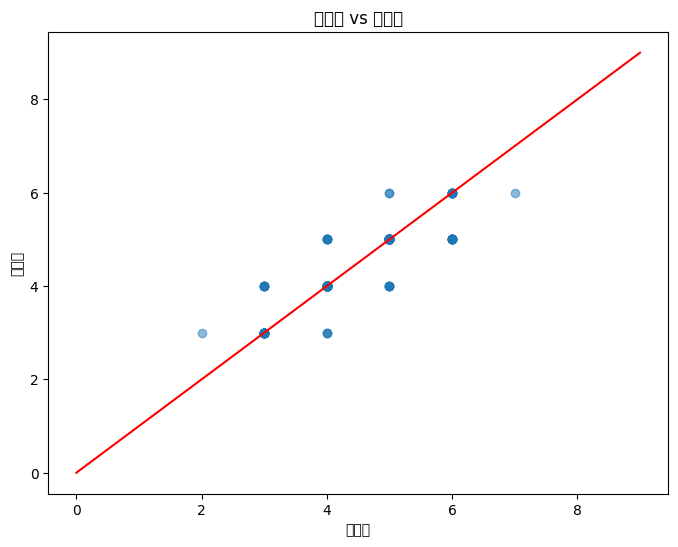

In [42]:
# 评估模型
with torch.no_grad():
    y_pred_class = model_class(X_test_tensor)
    _, predicted_class = torch.max(y_pred_class, 1)

    correct_class = (predicted_class == y_test_class).sum().item()
    total_class = y_test_class.size(0)
    accuracy_class = correct_class / total_class * 100
    print(f'测试集预测准确率: {accuracy_class:.2f}%')

    loss_class = criterion_class(y_pred_class, y_test_class).item()
    print(f'测试集交叉熵损失: {loss_class:.4f}')

    # 可视化真实值与预测值的对比
    plt.figure(figsize=(8,6))
    plt.scatter(y_test_class.numpy(), predicted_class.numpy(), alpha=0.5)
    plt.plot([0,9], [0,9], 'r')  # 对角线
    plt.xlabel('真实值')
    plt.ylabel('预测值')
    plt.title('真实值 vs 预测值')
    plt.show()

### 参数调优：

1、最开始默认用的learning_rate = 0.001，num_epochs = 100，正确率只有10%

2、在多次调整num_epochs效果不佳后，具体表现为损失下降很慢，调整了learning_rate，使得结果有了明显改善

3、在经过几轮的调整后，正确率稳定在了80%左右。

此时learning_rate = 0.05，num_epochs = 200